# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [6]:
# Create Empty Lists
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
print("Beginning Data Retrieval ")
print('-----------------------------')

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print('-----------------------------')
print("Data Retrieval Complete")
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : puerto baquerizo moreno
Processing Record 2 of Set 1 : kodiak
Processing Record 3 of Set 1 : rubiataba
Processing Record 4 of Set 1 : port elizabeth
Processing Record 5 of Set 1 : hohhot
Processing Record 6 of Set 1 : upernavik
Processing Record 7 of Set 1 : moranbah
Processing Record 8 of Set 1 : yumen
Processing Record 9 of Set 1 : busselton
Processing Record 10 of Set 1 : sao filipe
Processing Record 11 of Set 1 : santa marinella
Processing Record 12 of Set 1 : westport
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : torbay
Processing Record 15 of Set 1 : kapaa
Processing Record 16 of Set 1 : sao joao da barra
Processing Record 17 of Set 1 : palu
Processing Record 18 of Set 1 : bluff
Processing Record 19 of Set 1 : bethel
Processing Record 20 of Set 1 : chadiza
Processing Record 21 of Set 1 : meulaboh
Processing Record 22 of Set 1 : wagar
Processing Record 23 of Set 1 

Processing Record 34 of Set 4 : ngunguru
Processing Record 35 of Set 4 : port macquarie
Processing Record 36 of Set 4 : mongu
Processing Record 37 of Set 4 : haines junction
Processing Record 38 of Set 4 : jumla
Processing Record 39 of Set 4 : svetlyy
Processing Record 40 of Set 4 : nador
Processing Record 41 of Set 4 : bilma
Processing Record 42 of Set 4 : jamestown
Processing Record 43 of Set 4 : road town
Processing Record 44 of Set 4 : poum
Processing Record 45 of Set 4 : ponta do sol
Processing Record 46 of Set 4 : dobryatino
Processing Record 47 of Set 4 : namatanai
Processing Record 48 of Set 4 : san quintin
Processing Record 49 of Set 4 : kiama
Processing Record 50 of Set 4 : pangnirtung
Processing Record 0 of Set 5 : sabang
Processing Record 1 of Set 5 : ramsgate
Processing Record 2 of Set 5 : asau
City not found. Skipping...
Processing Record 3 of Set 5 : saint-joseph
Processing Record 4 of Set 5 : mount isa
Processing Record 5 of Set 5 : geraldton
Processing Record 6 of Set 

Processing Record 20 of Set 8 : along
Processing Record 21 of Set 8 : skjervoy
Processing Record 22 of Set 8 : ballina
Processing Record 23 of Set 8 : miranda
Processing Record 24 of Set 8 : kagalnitskaya
Processing Record 25 of Set 8 : rawson
Processing Record 26 of Set 8 : marshall
Processing Record 27 of Set 8 : dong hoi
Processing Record 28 of Set 8 : anshun
Processing Record 29 of Set 8 : gat
Processing Record 30 of Set 8 : gazli
Processing Record 31 of Set 8 : egvekinot
Processing Record 32 of Set 8 : sao sepe
Processing Record 33 of Set 8 : pevek
Processing Record 34 of Set 8 : kavaratti
Processing Record 35 of Set 8 : hoquiam
Processing Record 36 of Set 8 : roald
City not found. Skipping...
Processing Record 37 of Set 8 : arvika
Processing Record 38 of Set 8 : aguilas
Processing Record 39 of Set 8 : urucui
Processing Record 40 of Set 8 : erenhot
Processing Record 41 of Set 8 : kailua
Processing Record 42 of Set 8 : salta
Processing Record 43 of Set 8 : dolores
Processing Record

Processing Record 6 of Set 12 : syracuse
Processing Record 7 of Set 12 : porto velho
Processing Record 8 of Set 12 : berlevag
Processing Record 9 of Set 12 : igarka
Processing Record 10 of Set 12 : ormond beach
Processing Record 11 of Set 12 : gurlan
Processing Record 12 of Set 12 : waingapu
Processing Record 13 of Set 12 : alvarado
Processing Record 14 of Set 12 : mendi
Processing Record 15 of Set 12 : alice springs
Processing Record 16 of Set 12 : merauke
Processing Record 17 of Set 12 : portoferraio
City not found. Skipping...
Processing Record 18 of Set 12 : santa marta
Processing Record 19 of Set 12 : nola
Processing Record 20 of Set 12 : nibbar
Processing Record 21 of Set 12 : lagunas
City not found. Skipping...
Processing Record 22 of Set 12 : saint anthony
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Create DataFrame
df_weather = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})


In [76]:
# Export the city data into a .csv.
df_weather.to_csv("Resources/weather.csv", index=False)

# Show count of city rows
df_weather.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [16]:
# Display the DataFrame
df_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Baquerizo Moreno,-0.9000,-89.6000,78.80,78,75,4.61,EC,1621115464
1,Saint Paul Harbor,57.7900,-152.4072,46.40,76,90,9.22,US,1621115465
2,Rubiataba,-15.1644,-49.8033,71.55,49,100,2.84,BR,1621115465
3,Port Elizabeth,-33.9180,25.5701,59.00,94,100,1.99,ZA,1621115465
4,Hohhot,40.8106,111.6522,41.00,93,0,4.47,CN,1621115166


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
df_weather['Humidity'].max()

100

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

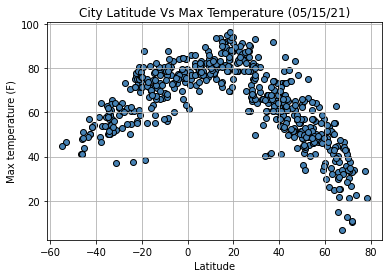

In [35]:
# create axis 
x_value1 = df_weather["Lat"]
y_value1 = df_weather["Max Temp"]

# Generate a scatter plot of Latitude vs. Temperature
fig1, ax1 = plt.subplots()
ax1.scatter(x_value1, y_value1, color = "steelblue", edgecolor = "black")
ax1.grid()
ax1.set(
       title="City Latitude Vs Max Temperature (05/15/21)",
       xlabel="Latitude",
       ylabel="Max temperature (F)");

plt.savefig("Graphs/LatvsTemp.png")

## Latitude vs. Humidity Plot

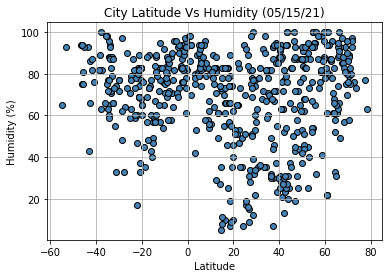

In [36]:
# create axis 
x_value2 = df_weather["Lat"]
y_value2 = df_weather["Humidity"]

# Generate a scatter plot of Latitude vs. Humidity
fig2, ax2 = plt.subplots()
ax2.scatter(x_value2, y_value2, color = "steelblue", edgecolor = "black")
ax2.grid()
ax2.set(
       title="City Latitude Vs Humidity (05/15/21)",
       xlabel="Latitude",
       ylabel="Humidity (%)");

plt.savefig("Graphs/LatvsHum.png")

## Latitude vs. Cloudiness Plot

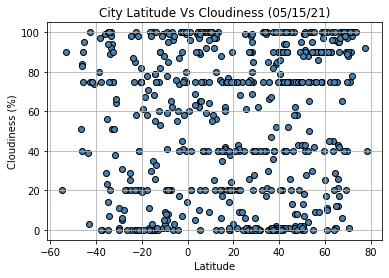

In [38]:
# create axis 
x_value3 = df_weather["Lat"]
y_value3 = df_weather["Cloudiness"]

# Generate a scatter plot of Latitude vs. Cloudiness
fig3, ax3 = plt.subplots()
ax3.scatter(x_value3, y_value3, color = "steelblue", edgecolor = "black")
ax3.grid()
ax3.set(
       title="City Latitude Vs Cloudiness (05/15/21)",
       xlabel="Latitude",
       ylabel="Cloudiness (%)");

plt.savefig("Graphs/LatvsCloud.png")

## Latitude vs. Wind Speed Plot

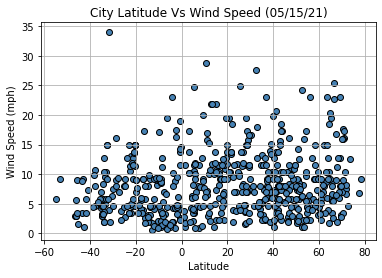

In [39]:
# create axis 
x_value4 = df_weather["Lat"]
y_value4 = df_weather["Wind Speed"]

# Generate a scatter plot of Latitude vs. Wind Speed
fig4, ax4 = plt.subplots()
ax4.scatter(x_value4, y_value4, color = "steelblue", edgecolor = "black")
ax4.grid()
ax4.set(
       title="City Latitude Vs Wind Speed (05/15/21)",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");

plt.savefig("Graphs/LatvsWindSpd.png")

## Linear Regression

In [48]:
# Create Linear Regression Function
def linear_regression(df, y_column, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [49]:
# Create Northern and Southern Hemisphere DataFrames
df_north_hem = df_weather.loc[df_weather['Lat'] > 0, :]
df_south_hem = df_weather.loc[df_weather['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8505286348211265


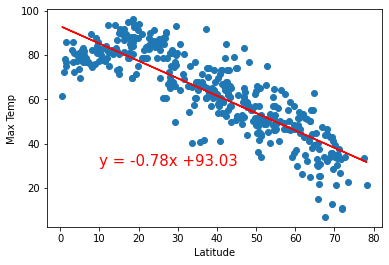

In [52]:
linear_regression(df_north_hem, 'Max Temp', 'Max Temp', 'Graphs/NorthHem_TempvsLat_LinReg.png', (10,30))

Analysis #1:

There is a strong negative correlation between max temperature and latitude for the northern hemisphere. This shows that as you move away from the equator, average temperatures of cities are lower.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7577536646704318


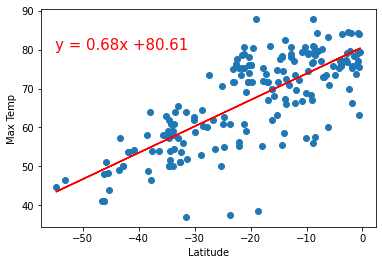

In [54]:
linear_regression(df_south_hem, 'Max Temp', 'Max Temp', 'Graphs/SouthHem_TempvsLat_LinReg.png', (-55,80))

Analysis #2:

There is a strong positive correlation between max temperature and latitude for the southern hemisphere. This shows that as you approach the equator, average temperatures of cities are higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12478580047961396


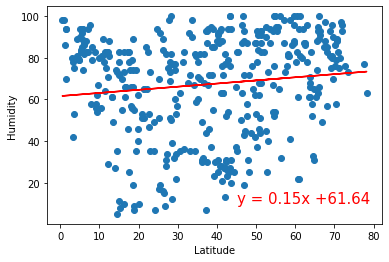

In [58]:
linear_regression(df_north_hem, 'Humidity', 'Humidity', 'Graphs/NorthHem_HumvsLat_LinReg.png', (45,10))

Analysis #3:

There is a slight positive correlation between humidity and latitude for the northern hemisphere. This shows that as you move further from the equator, humidity levels may increase.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03657626460089465


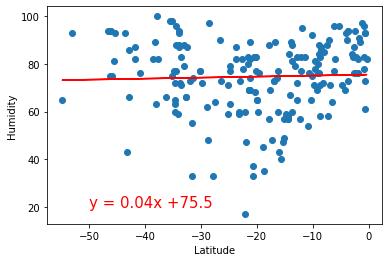

In [61]:
linear_regression(df_south_hem, 'Humidity', 'Humidity', 'Graphs/SouthHem_HumvsLat_LinReg.png', (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10745774832441445


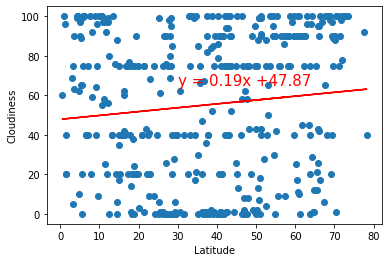

In [69]:
linear_regression(df_north_hem, 'Cloudiness', 'Cloudiness', 'Graphs/NorthHem_CloudvsLat_LinReg.png', (30,65))

Analysis #4:

There is a slight positive correlation between cloudiness and latitude for the northern hemisphere. This shows that as you move further from the equator, cloudiness levels may increase.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.01715056660253227


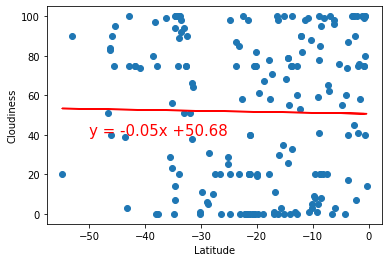

In [71]:
linear_regression(df_south_hem, 'Cloudiness', 'Cloudiness', 'Graphs/SouthHem_CloudvsLat_LinReg.png', (-50,40))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.006966650486356873


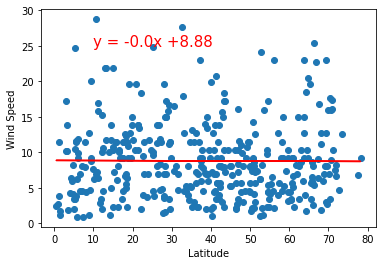

In [73]:
linear_regression(df_north_hem, 'Wind Speed', 'Wind Speed', 'Graphs/NorthHem_WindSpdvsLat_LinReg.png', (10,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.030457033273133382


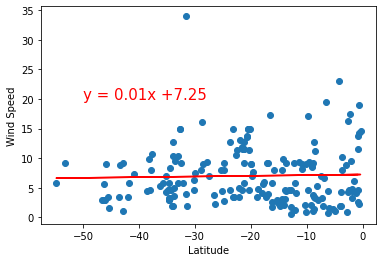

In [75]:
linear_regression(df_south_hem, 'Wind Speed', 'Wind Speed', 'Graphs/SouthHem_WindSpdvsLat_LinReg.png', (-50,20))